In [1]:
import os
import re
import numpy as np
import scipy.io as sio
import imageio
import tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
# from utlis.projection import *                                 
from utlis.com_traga_utlis import load_data, plot_3d_trajectory, detect_jumps, generate_jump_video#*
# from utlis.com_traga_utlis import plot_com_all, process_folders, temp_change_calib_pos_to_0, generate_dannce_vid_seq# *

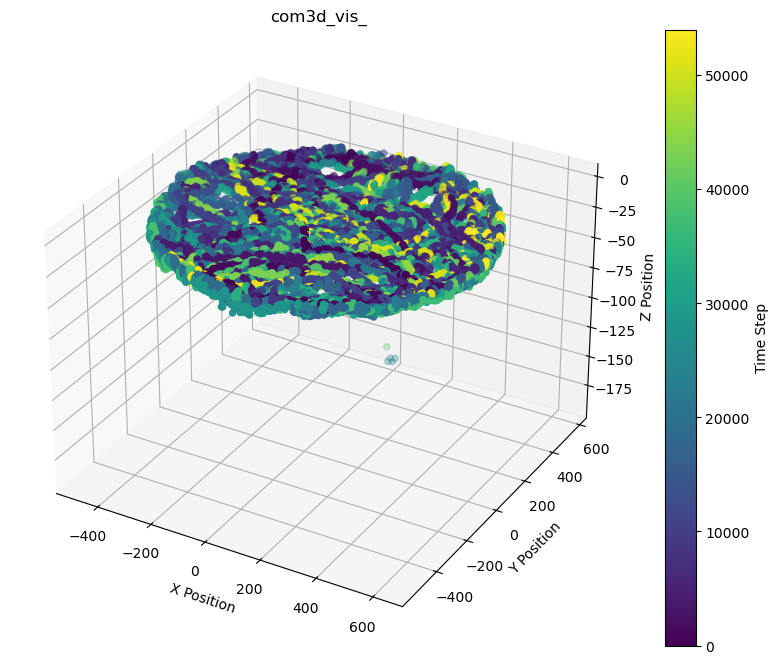

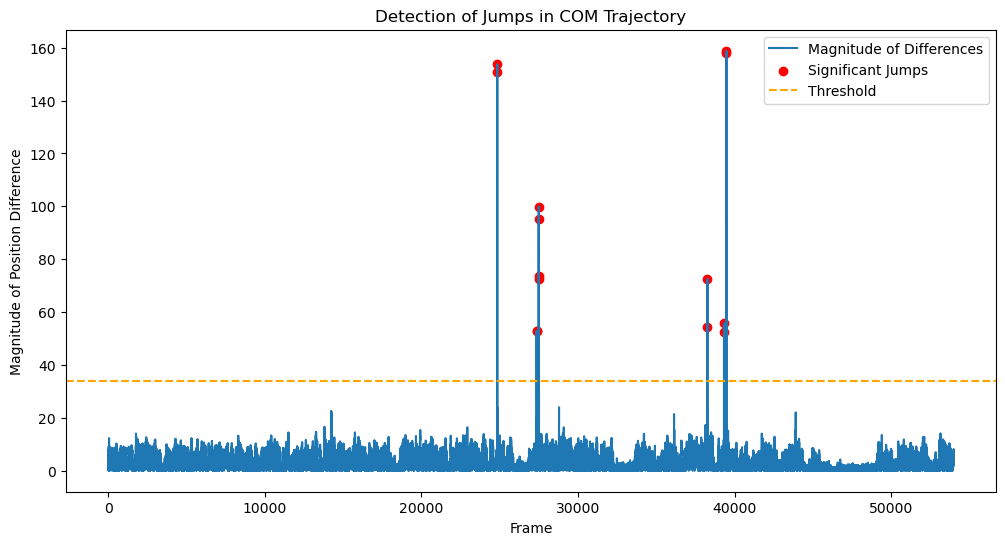

saved into npy. Frames with significant jumps: [24845 24849 27352 27353 27493 27494 27504 27506 38263 38265 39320 39321
 39477 39478]
14
N_FRAMES 14
pred_2d 14


100%|██████████| 14/14 [00:07<00:00,  1.87it/s]


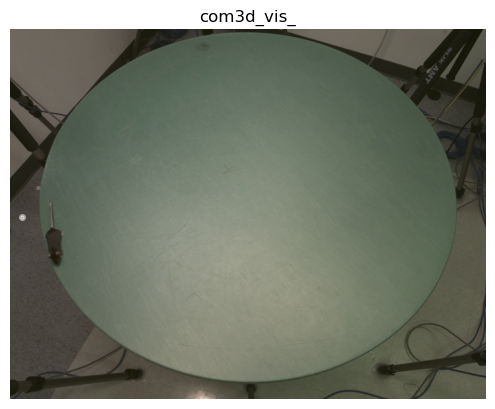

In [2]:
weired_folders = [
    # "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_caffeine_1448",
    # "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1051",
    # "/home/lq53/mir_data/24summ/2024_07_10/1691485_no_hole_habituation_13_59"
    "/home/lq53/mir_data/24summ/2024_06_26/1686940_left"
]

for wie in weired_folders:
    # /home/lq53/mir_data/24summ/2024_06_26/1686940_left/COM_df/predict_results//vis/vis_combined_Camera2_1000_from_0.mp4
    com_foler = os.path.join(wie, 'COM_df/predict_results/df_labels_240816_6comsets_continued')
    com_path = os.path.join(com_foler, 'com3d.mat')   
    com_folder_save = os.path.join(com_foler, 'vis')
    if not os.path.exists(com_folder_save):
        os.makedirs(com_folder_save)
    graph_title = "com3d_vis_"
    
    com_data = load_data(com_path)

    plot_3d_trajectory(com_data, graph_title, com_folder_save)
    jump_indices = detect_jumps(com_data, com_folder_save)

    # # # produce video, which is not necessary if not labeling more com to detect what's wrong


    save_path = com_folder_save # os.path.join(com_foler, 'vis') #os.path.join(pred_path, 'vis')
    # if not os.path.exists(save_path):
    #     os.makedirs(save_path)
    base_folder = wie
    base_base_folder = os.path.dirname(base_folder)
    generate_jump_video(com_data, base_folder, jump_indices, graph_title, save_path, cam='Camera1')


    